[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1wKLDmv4t4HLt14fJ7rCw9yA2hLYjI-U4?usp=sharing)

#Preprocessing

##Introduction


This notebook focuses on the **preprocessing stage of a machine learning pipeline** a critical step before applying any model. We begin with loading and understanding a dataset, preparing features and targets, and then dive into multiple preprocessing techniques using Scikit-Learn. Each method is applied through clean, modular pipelines that highlight how real-world ML workflows should be structured.


In [80]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#Importing required models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Importing Pipeline for structured way for processing
from sklearn.pipeline import Pipeline

### Loading the Dataset

We load a dataset from a CSV file named `drawndata1.csv` using **pandas**.

- The file is assumed to be in the same directory as the notebook.
- The dataset is stored in a DataFrame named `df`.


### Dataset Structure

The dataset contains the following columns:

- **x**: Feature column
- **y**: Feature column
- **z**: Target column (could be used for classification or regression, depending on context)


In [81]:
# Load dataset
df = pd.read_csv('drawndata1.csv')  # Reads the CSV file into a DataFrame ,Its provided i same directory

#  Preview dataset using pandas
print(df.head(3))  # Shows first 3 rows

# Dataset contains three columns: x, y, and z

            x           y  z
0   58.080365  225.699042  a
1  238.867357  247.456645  a
2  156.218212  286.588782  a


### Defining Features and Target

We now separate the dataset into:

- **X (Features)**: Input data used for training the model
- **y (Target)**: Labels or outcomes we want the model to predict



In [82]:
# Define X (features) and y (target)

X = df[['x', 'y']].values  # Extracts columns 'x' and 'y' as a NumPy array
y = df['z'] == 'a'  # Creates a Boolean array (True if 'z' == 'a', False otherwise)

#z==y(target) and (x and y of dataset = X(featurees))

### Matplotlib to visualize raw data

We use a scatter plot to visualize the dataset and understand the class distribution.



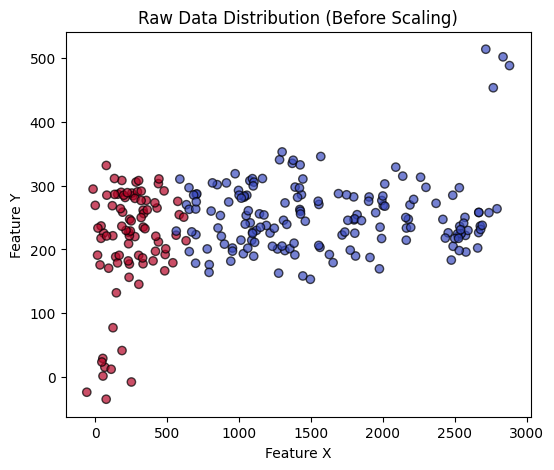

In [83]:
#Matplotlib
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Raw Data Distribution (Before Scaling)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")

plt.show()

## Quantile Transformer

##Preprocessing 1

###Handling Outliers


From the scatter plot, it's evident that there are **outliers** present in the data. These can distort the performance of many machine learning algorithms especially distance based models like KNN.

To address this, we use two preprocessing techniques:

- **QuantileTransformer**: Transforms features to follow a uniform or normal distribution, making it robust to outliers.

### Notes
- `StandardScaler` is a **scaler**  it changes the scale, not the distribution.
- `QuantileTransformer` is a **transformer**  it changes the distribution shape.


In [84]:

#Quantile Transformer in presprocessing
from sklearn.preprocessing import  QuantileTransformer


### Defining Features (X) and Target (y)

Although this was done earlier, this block reaffirms the feature and target extraction for clarity before preprocessing or modeling.



In [85]:
#Define Features (X) and Target (y)

# As dataset contains three columns: x, y, and z
# We extract `x` and `y` as features and classify `z`
X = df[['x', 'y']].values  # Convert features to NumPy array #Is this df [['x,'y ']] is numpy syntax to make x and y labels as X (features)
y = (df['z'] == 'a')  # Convert target to binary classification (True/False)?? doest it make the z or target column in 0 and 1???

###Pipeline

### Defining kNN Model with Pipeline
- A `Pipeline` is used to streamline preprocessing and model training steps.
- Steps are executed in sequence: first scaling, then modeling.

### Pipeline Components
- `'scale'`: `QuantileTransformer(n_quantiles=100)` is used to reduce the impact of outliers.
- `'model'`: `KNeighborsClassifier(n_neighbors=5)` applies k-Nearest Neighbors with `k=5`.

### Notes
- You cannot use **two scalers simultaneously** in the same pipeline step. Only one scaler can be active at a time.
- To test both scalers, define **two separate pipelines** one with `StandardScaler` and one with `QuantileTransformer`.



In [86]:
# Define kNN model and QuantileTransformer using Pipeline
pipe= Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    #('scale',StandardScaler())
    ('model', KNeighborsClassifier(n_neighbors=5))  # kNN with k=5
])

### Train Model

### Fitting the Pipeline
- The pipeline (`pipe`) is trained using `.fit(X, y)`.
- This applies the `QuantileTransformer` to `X`, then fits the `KNeighborsClassifier` on the transformed data.

### Output
- `model` now holds the **fitted pipeline**, ready for prediction or evaluation.


In [87]:
#model.fit()
model=pipe.fit(X,y)


### Predict on Training Data

### Making Predictions
- `model.predict(X)` applies the pipeline steps:
  - First transforms `X` using `QuantileTransformer`.
  - Then predicts class labels using the trained `KNeighborsClassifier`.
- The result is stored in `prediction`, containing the predicted class (`True` or `False`) for each sample.


In [88]:
# Predict on training data
prediction=model.predict(X)


### Model Performance Evaluation

### Accuracy Calculation
- Accuracy is computed using:
  - `(prediction == y).mean()`: compares predicted labels to true labels and takes the mean (proportion of correct predictions).
- The result is printed as a percentage.




In [89]:
#Model Performance Evaluation

accuracy = (prediction == y).mean()
print(f"\n✅ Model Accuracy: {accuracy:.2%}")



✅ Model Accuracy: 98.81%




```
Note
- In scikit-learn, evaluation is done manually or via metrics like `accuracy_score`, `confusion_matrix`, etc.

- This is **not** the same as `model.evaluate()` because:
  - `model.evaluate()` is used in frameworks like **Keras** (TensorFlow), not in **scikit-learn**.
  
```



###MAtplotlib visualize the Quantile Transformer

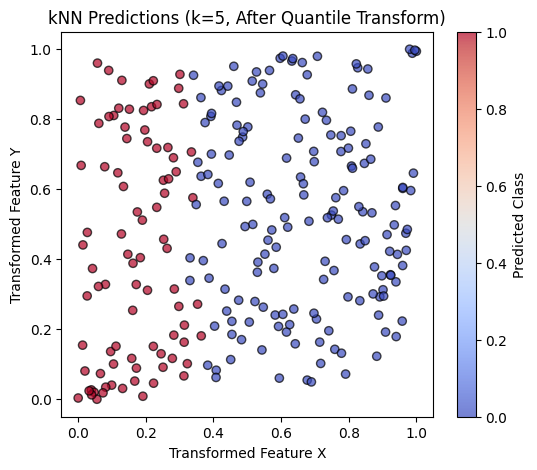

In [90]:
# Get the transformed features from the pipeline for visualization
X_transformed = model.named_steps['scale'].transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=predictions, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("kNN Predictions (k=5, After Quantile Transform)")
plt.xlabel("Transformed Feature X")
plt.ylabel("Transformed Feature Y")
plt.colorbar(label="Predicted Class")
plt.show()


##Polynomial Features

##Preprocessing 2


In [91]:
#Polynomial Logistic Regression Used for non linear dataset

#Importing models and pipeline
#Importing Preprocessing Ploynomial Features
from sklearn.preprocessing import PolynomialFeatures  # Generates polynomial features
from sklearn.linear_model import LogisticRegression  #Used for binary/multiclass classification tasks.


### Load Dataset

### Dataset Structure
- The dataset likely contains three columns: `x`, `y`, and `z`.
- `x` and `y` are used as **features**.
- `z` is the **target column**, containing two categories: `'a'` and `'b'`.

### Notes
- This is a binary classification task.
- You’ll convert `z` into binary values (`True/False` or `0/1`) later for model compatibility.


In [92]:

df = pd.read_csv('drawndata2.csv')  # Load dataset provided in same diectory
print("Last 5 rows of the dataset using tail:")
print(df.tail())  # Display first 5 rows to understand structure


Last 5 rows of the dataset using tail:
              x          y  z
212  600.143988  80.491534  b
213  568.999685  83.044558  b
214  618.746701  76.644596  b
215  623.827439  33.224234  b
216  642.272897  94.931771  b


###Defining X and y (features and targets)

In [93]:
# Define Features (X) and Target (y)

X = df[['x', 'y']].values  # Selecting 'x' and 'y' columns as input features
y = (df['z'] == 'a')  # Convert target to binary classification (True for 'a', False otherwise)

###Pipeline

### Defining the Pipeline
- A pipeline is constructed to automate the preprocessing and modeling steps.

### Pipeline Components
- `'poly_features'`: `PolynomialFeatures(degree=2)`  
  - Expands the input features to include second-degree polynomial combinations, such as `x²`, `y²`, and `xy`.
- `'model'`: `KNeighborsClassifier()`  
  - Applies the k-Nearest Neighbors algorithm for classification.

### Purpose
- This setup enables the model to capture **non-linear decision boundaries** by transforming the feature space.


In [94]:
#Pipeline
pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', KNeighborsClassifier())  # Classification model
])

###Model Training

### Fitting the Pipeline
- `model = pipe.fit(X, y)`
  - This command trains the entire pipeline:
    - First, it applies the polynomial transformation on `X`.
    - Then, it fits the transformed data to the `KNeighborsClassifier`.

### Result
- The `model` now contains both the transformation logic and the trained classifier.
- You can use `model.predict()` directly without reapplying transformations.


In [95]:
model=pipe.fit(X,y)

### Making Predictions

### Predict on Training Data
- `prediction = model.predict(X)`
  - The pipeline internally transforms `X` using `PolynomialFeatures` before making predictions.
  - No need to manually transform `X` again — the pipeline handles it.

### Purpose
- This step generates predicted class labels for the training data.


In [96]:

prediction=model.predict(X)


### Model Performance Evaluation

### Accuracy Calculation
- Accuracy is computed using:
  - `(prediction == y).mean()`: compares predicted labels to true labels and takes the mean (proportion of correct predictions).
- The result is printed as a percentage.




In [97]:
#Model Accuracy
accuracy = (prediction == y).mean()
print(f"\n✅ Model Accuracy: {accuracy:.2%}")



✅ Model Accuracy: 99.08%


###Matplotlib for Polynomial Features

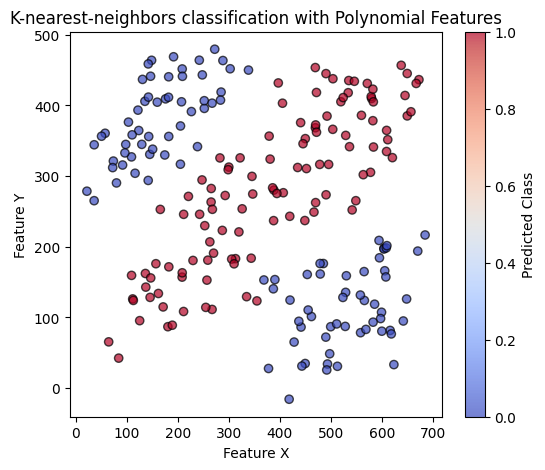

In [98]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("K-nearest-neighbors classification with Polynomial Features")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.colorbar(label="Predicted Class")
plt.show()

##One-Hot Encoding

##Pre-Processing 3

### Importing Preprocessing Tool
- `from sklearn.preprocessing import OneHotEncoder`

### When to Use One-Hot Encoding
- **Use Case**: When your feature columns contain **categorical string values** (e.g., `'red'`, `'blue'`, `'green'`).
- **Purpose**: Converts string labels into **binary vectors** so that machine learning models can interpret them numerically.





In [99]:
#Importing OneHotEncoder from sklearn preprocessing
from sklearn.preprocessing import OneHotEncoder

### Example Behavior
| Color | One-Hot Encoding |
|-------|------------------|
| Red   | [1, 0, 0]        |
| Blue  | [0, 1, 0]        |
| Green | [0, 0, 1]        |



```
Note
OneHotEncoder does **not** automatically apply to the entire DataFrame  you must specify which columns to encode.
```



### Defining Categorical Data

### Sample Data Setup
- We define an array of ordinal categories: `"low"`, `"medium"`, `"high"`.

### Why `.reshape(-1, 1)`?
- **OneHotEncoder** expects a **2D array** with shape `(n_samples, n_features)`.
- `np.array([...]).reshape(-1, 1)` converts a 1D array into a 2D array with one column — making it compatible for encoding.


In [100]:
#Define Categorical Data
arr = np.array(["low", "low", "medium", "high"]).reshape(-1, 1) #Made it 2-d array

print("Original Categorical Data:\n", arr)

Original Categorical Data:
 [['low']
 ['low']
 ['medium']
 ['high']]


### Initializing OneHotEncoder

### Encoder Configuration
- `sparse_output=False`:  
  - Returns a **dense NumPy array** instead of a sparse matrix.
  - Makes it easier to view and manipulate for small datasets.

- `handle_unknown='ignore'`:  
  - Prevents the encoder from throwing an error if it encounters a **category it wasn't trained on** during `.transform()`.
  - If data includes a category like `"very high"` (which wasn't present during `.fit()`), it will be **ignored** during transformation  resulting in all zeros for that row.



In [101]:
#Initialize OneHotEncoder

# `sparse_output=False` ensures the output is a dense NumPy array instead of a sparse matrix.
# `handle_unknown='ignore'` prevents errors when an unknown category appears during transformation.

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

###Model Train

### Purpose
- Convert categorical string data (like `"low"`, `"medium"`, `"high"`) into **numerical** format using **One-Hot Encoding**.
- This is essential because most ML models only accept numeric input.

### Explanation
- `.fit()` learns the unique categories: `["high", "low", "medium"]` (alphabetical by default).
- `.transform()` converts each value to a **binary vector**.
- `.fit_transform()` combines both in a single step.

### Why Not Just `.fit()`?
- `.fit()` alone does **not** return transformed data.  
  You need `.transform()` to get the encoded output.
- `.fit_transform()` is a shortcut to perform both operations at once.



In [102]:
#Training

model = encoder.fit_transform(arr)

print("One-Hot Encoded Output:\n", model)

One-Hot Encoded Output:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### Handling Unknown Categories in One-Hot Encoding

### Background
- `OneHotEncoder` only knows the categories it **sees during training** (i.e., during `.fit()`).
- If you try to encode a new category later that wasn't present during `.fit()`, it could cause errors.

### Problem Without `handle_unknown='ignore'`
- If `"zero"` was **not** in the training data and you call `.transform([["zero"]])`,  
  you'd normally get a **ValueError** — "unknown category".

### Solution
- By setting `handle_unknown='ignore'`, the encoder will **silently ignore** any unseen category and return an **all-zero vector**.

---

### Example:



In [103]:
#Handling Unkonwn category

unknown_category = np.array([["zero"]])
model_unknown = encoder.transform(unknown_category)

print("Encoding for an Unknown Category ('zero'):\n", model_unknown)




Encoding for an Unknown Category ('zero'):
 [[0. 0. 0.]]


##Summary
# Preprocessing

Load Dataset (`drawndata2.csv`)  
↓  
---

Explore Data (`df.tail()`)  
↓  


Define Features and Target  
- X = df[['x', 'y']]  
- y = (df['z'] == 'a')  
↓  


Preprocessing 1: QuantileTransformer  
- Pipeline: scale → KNN  
↓  


Train Model and Predict  
↓  
  

Visualize Predictions  
↓  


Preprocessing 2: PolynomialFeatures  
- Pipeline: polynomial → KNN  
↓  


Train Model and Predict  
↓  


Preprocessing 3: OneHotEncoder  
- Encode: ["low", "medium", "high"]  
- handle_unknown = 'ignore'  
↓  


Transform Known and Unknown Categories  



##  Navigation

[![➡️ Metrics](https://img.shields.io/badge/next-metrics-000000?style=for-the-badge&logo=github&logoColor=00FF80)](https://github.com/aypy01/scikit-learn/tree/main/metrics1)
&nbsp;&nbsp;&nbsp;&nbsp;


## Author
 <p align="left">
  Created and maintained by
  <a href="https://github.com/aypy01" target="_blank">&nbsp Aaditya Yadav</a>&nbsp
  <a href="https://github.com/aypy01" target="_blank">
    <img src="https://img.shields.io/badge/aypy01-000000?style=flat-square&logo=github&logoColor=00FF80" alt="GitHub Badge"/>
  </a>
</p>

</p>
<p align="left">
  <img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>


## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).